<a href="https://colab.research.google.com/github/KoechCarl/Aviation-Analysis/blob/main/Aviation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Understanding

My company is diversifying its portfolio to new industries, specifically the Aviation Industry. They are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft.

These risks may pertain to plane crashes, accident frequencies, fatalities etc.

## Objectives

I have been tasked with determining which aircraft are the lowest risk for the company to start this new business endeavor.

My findings will be translated into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

# Data Understanding

I will be working with *Aviation_Data.csv* which is from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.

In order to understand the dataset I am working with, I will need to:

  - Load the dataset onto the notebook by the use of *Pandas*.
  - Preview the dataset by using built-in Pandas functions.

In [10]:
# Importing pandas
import pandas as pd

In [11]:
# Loading in the dataset
aviation_df = pd.read_csv("Aviation_Data.csv")

/tmp/ipython-input-213725815.py:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  aviation_df = pd.read_csv("Aviation_Data.csv")


In [12]:
# Previewing the first 5 rows of data
aviation_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [13]:
# Looking at the columns the dataset holds
aviation_df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [14]:
# Viewing the structure of the dataset
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [15]:
# Viewing the number of rows and columns the dataset holds
aviation_df.shape

(90348, 31)

The information that we have obtained from loading and previewing the dataset is that ;
 - This dataset hold 90348 rows and 31 columns.
 - From previewing the first 5 rows of data, we see that the dataset has a lot of mising values.


# Data Preparation

In this part, I am going to clean the dataset to prepare it for modelling and analysis.

The cleaning will be done via :
   - Dropping or renaming missing values.
   - Dropping any duplicates.
   - Standardizing text fields.
   - Dropping irrelevant columns.

In [21]:
# Let's check for duplicates
aviation_df.duplicated().sum()

np.int64(1390)

In [22]:
# Let's drop them and check if they're still there
aviation_df = aviation_df.drop_duplicates()
aviation_df.duplicated().sum()

np.int64(0)

In [24]:
#Let's see the number of missing values per column
aviation_df.isnull().sum()

,0
Event.Id,69
Investigation.Type,0
Accident.Number,69
Event.Date,69
Location,121
Country,295
Latitude,54576
Longitude,54585
Airport.Code,38826
Airport.Name,36254


In [34]:
# Replacing the missing values with 0 in the injury columns
injury_cols = [
    'Total.Fatal.Injuries',
    'Total.Serious.Injuries',
    'Total.Minor.Injuries',
    'Total.Uninjured'
]

aviation_df[injury_cols] = aviation_df[injury_cols].fillna(0)
aviation_df[injury_cols].isnull().sum()

/tmp/ipython-input-994387078.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aviation_df[injury_cols] = aviation_df[injury_cols].fillna(0)


,0
Total.Fatal.Injuries,0
Total.Serious.Injuries,0
Total.Minor.Injuries,0
Total.Uninjured,0


In [37]:
# Replacing missing values with unknown in the categorical columns
categorical_cols = [
    'Aircraft.Category',
    'Engine.Type',
    'Weather.Condition',
    'Broad.phase.of.flight'
]

aviation_df[categorical_cols] = aviation_df[categorical_cols].fillna('unknown')
aviation_df[categorical_cols].isnull().sum()

,0
Aircraft.Category,0
Engine.Type,0
Weather.Condition,0
Broad.phase.of.flight,0


In [41]:
# Dropping rows containing missing values in the following columns
aviation_df = aviation_df.dropna(subset=[
    'Event.Date',
    'Make',
    'Model',
    'Country'
])


Above I have cleaned only specific columns from the dataset and left the rest with missing values. I have done so because most columns are irrelevant to the investment risk analysis so I intentionally excluded from the analytical dataset and left unmodified. Data cleaning efforts focused only on variables directly used in modeling, visualization, and business recommendations.”

# Visualisations

Since the relevant columns from the dataset have been cleaned, it is time to work with them to create visualisations that help answer questions which are important to the business' decision.

The questions that will be answered are :
 - Which aircraft manufacturers are involved in the most accidents?
 - Which aircraft manufacturers are associated with the most severe outcomes?
 - Is aircraft safety improving or deteriorating over time?
 - Are most accidents survivable?

In [42]:
# Importing Matplotlib
import matplotlib.pyplot as plt

## Accident Frequency by Aircraft Manufacturer

This visualisation will help the business avoid investments on manufacturers with consistently high accidents.

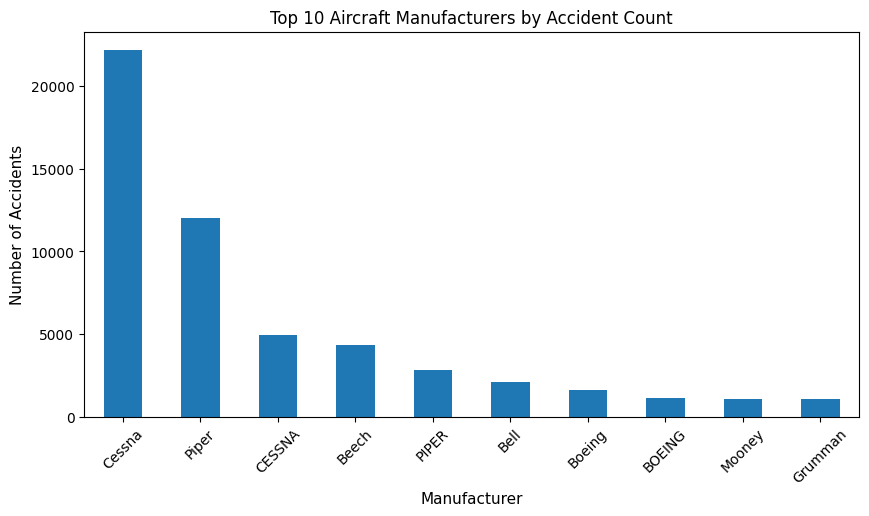

In [46]:
# Creating a series with manufacturers as labels and accident counts as values.
top_makes = (aviation_df['Make'].value_counts().nlargest(10))

# Plotting the visualisation
top_makes.plot(kind='bar', figsize=(10, 5))
plt.title('Top 10 Aircraft Manufacturers by Accident Count')
plt.xlabel('Manufacturer',size = 11)
plt.ylabel('Number of Accidents',size = 11)
plt.xticks(rotation=45)
plt.show()